In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("/content/drive/MyDrive/heart_disease_prediction.csv")
df

Age     Sex    ChestPainType  RestingBP  Cholesterol  FastingBS  \
0       68    Male   Typical Angina        124          189          1   
1       81  Female   Typical Angina        113          269          0   
2       58  Female      Non-Anginal        149          130          0   
3       44  Female  Atypical Angina        155          141          1   
4       72  Female   Typical Angina         91          168          1   
...    ...     ...              ...        ...          ...        ...   
79995   44  Female   Typical Angina        122          136          0   
79996   30    Male     Asymptomatic        161          244          0   
79997   50  Female     Asymptomatic         96          159          1   
79998   66    Male     Asymptomatic         99          201          0   
79999   36  Female   Typical Angina        109          131          1   

                         RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  \
0      Left Ventricular Hypertrophy     71             No      4.2       Up   
1      Left Ventricular Hypertrophy     82            Yes      4.6     Flat   
2             ST-T Wave Abnormality    118            Yes      4.6       Up   
3      Left Ventricular Hypertrophy    135             No      1.1       Up   
4                            Normal    150            Yes      4.1       Up   
...                             ...    ...            ...      ...      ...   
79995         ST-T Wave Abnormality    157            Yes      0.9     Down   
79996                        Normal     70            Yes      4.0     Flat   
79997  Left Ventricular Hypertrophy     71             No      4.4     Down   
79998                        Normal    177            Yes      4.6     Flat   
79999         ST-T Wave Abnormality    179             No      4.3     Flat   

       Diabetes SmokingHistory   BMI  HeartDisease  
0             0          Never  31.6             1  
1             0          Never  25.0             0  
2             0        Current  27.3             1  
3             0        Current  25.4             0  
4             1          Never  24.4             1  
...         ...            ...   ...           ...  
79995         1        Current  33.3             0  
79996         1        Current  39.5             1  
79997         1          Never  21.2             1  
79998         0          Never  20.0             1  
79999         1         Former  36.8             1  

[80000 rows x 15 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             80000 non-null  int64  
 1   Sex             80000 non-null  object 
 2   ChestPainType   80000 non-null  object 
 3   RestingBP       80000 non-null  int64  
 4   Cholesterol     80000 non-null  int64  
 5   FastingBS       80000 non-null  int64  
 6   RestingECG      80000 non-null  object 
 7   MaxHR           80000 non-null  int64  
 8   ExerciseAngina  80000 non-null  object 
 9   Oldpeak         80000 non-null  float64
 10  ST_Slope        80000 non-null  object 
 11  Diabetes        80000 non-null  int64  
 12  SmokingHistory  80000 non-null  object 
 13  BMI             80000 non-null  float64
 14  HeartDisease    80000 non-null  int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 9.2+ MB


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
Diabetes          0
SmokingHistory    0
BMI               0
HeartDisease      0
dtype: int64

In [6]:
df.describe()

Age     RestingBP   Cholesterol     FastingBS         MaxHR  \
count  80000.000000  80000.000000  80000.000000  80000.000000  80000.000000   
mean      59.553812    134.393075    235.124513      0.497887    134.385713   
std       17.327442     25.900348     66.594618      0.499999     37.665161   
min       30.000000     90.000000    120.000000      0.000000     70.000000   
25%       45.000000    112.000000    177.000000      0.000000    102.000000   
50%       59.000000    134.000000    235.000000      0.000000    134.000000   
75%       75.000000    157.000000    293.000000      1.000000    167.000000   
max       89.000000    179.000000    349.000000      1.000000    199.000000   

            Oldpeak      Diabetes           BMI  HeartDisease  
count  80000.000000  80000.000000  80000.000000  80000.000000  
mean       3.105599      0.497663     29.263940      0.503025  
std        1.787505      0.499998      6.201344      0.499994  
min        0.000000      0.000000     18.500000      0.000000  
25%        1.600000      0.000000     23.900000      0.000000  
50%        3.100000      0.000000     29.300000      1.000000  
75%        4.700000      1.000000     34.600000      1.000000  
max        6.200000      1.000000     40.000000      1.000000

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
def conv(value):
  if value==1:
    return "Yes"
  else:
    return "No"

df['Diabetes']=df['Diabetes'].apply(conv)
df['HeartDisease']=df['HeartDisease'].apply(conv)

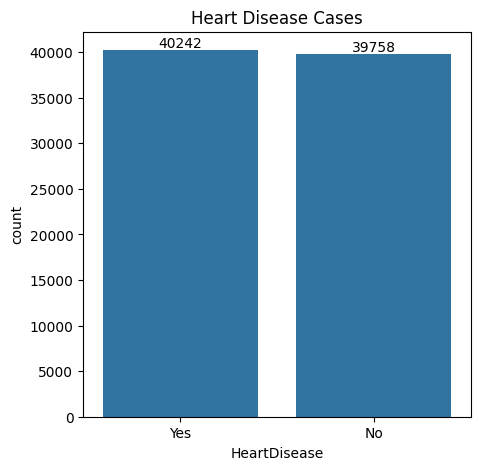

In [9]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='HeartDisease',data=df)
ax.bar_label(ax.containers[0])
plt.title("Heart Disease Cases")
plt.show()

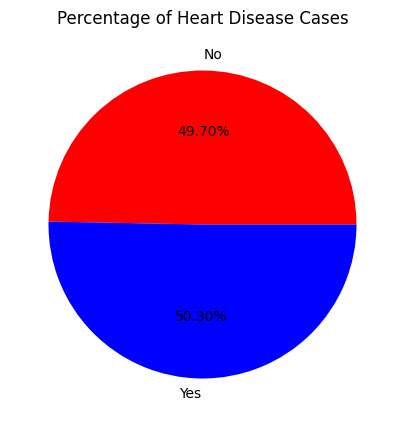

In [10]:
plt.figure(figsize=(5,5))
grp_by=df.groupby('HeartDisease').agg({'HeartDisease':'count'})
colors=['red','blue']
plt.pie(grp_by['HeartDisease'], labels=grp_by.index, autopct="%1.2f%%",colors=colors)
plt.title("Percentage of Heart Disease Cases")
plt.show()

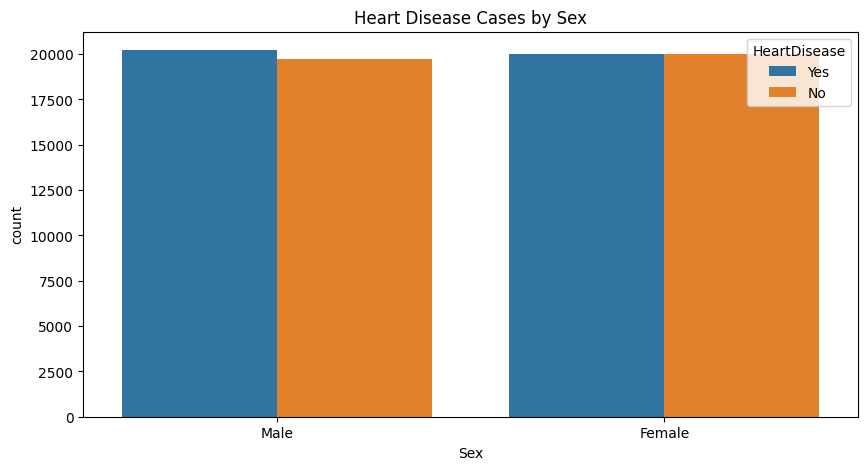

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex', data=df, hue="HeartDisease")
plt.title("Heart Disease Cases by Sex")
plt.show()

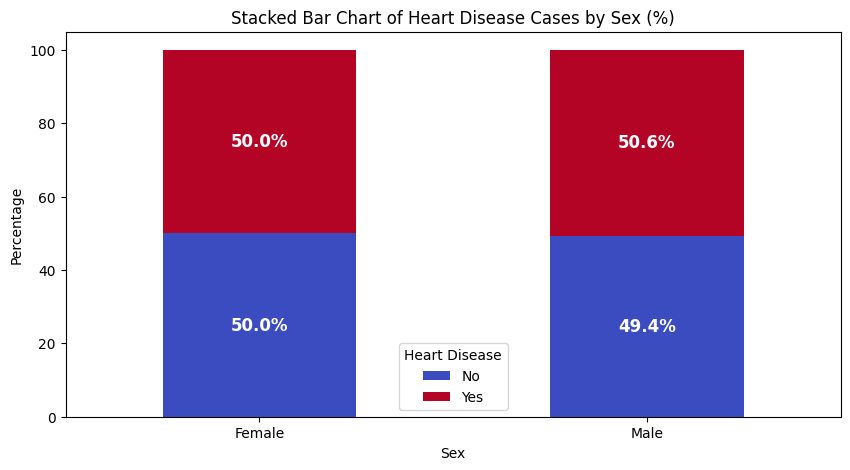

In [12]:
grouped_data = df.groupby(['Sex', 'HeartDisease']).size().unstack()

grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

ax = grouped_data_percentage.plot(kind='bar', stacked=True, figsize=(10, 5), colormap="coolwarm")

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", color="white", fontsize=12, weight="bold")

plt.title("Stacked Bar Chart of Heart Disease Cases by Sex (%)")
plt.xlabel("Sex")
plt.ylabel("Percentage")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.xticks(rotation=0)
plt.show()


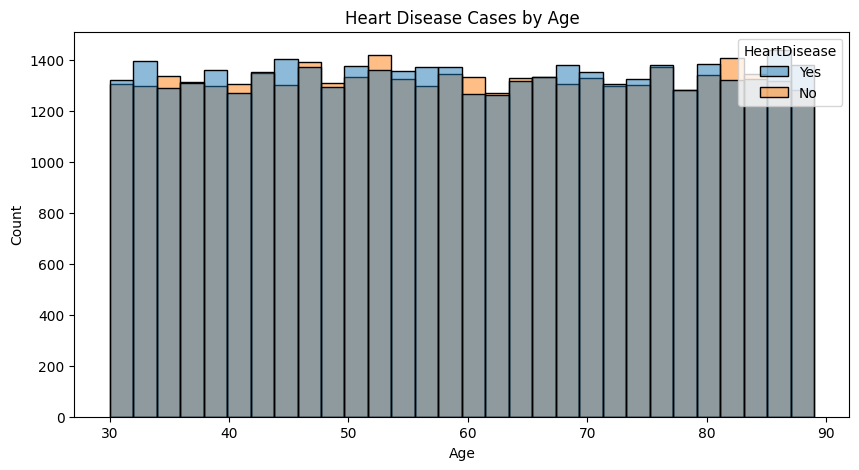

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(x="Age", data=df, bins=30, hue="HeartDisease")
plt.title("Heart Disease Cases by Age")
plt.show()

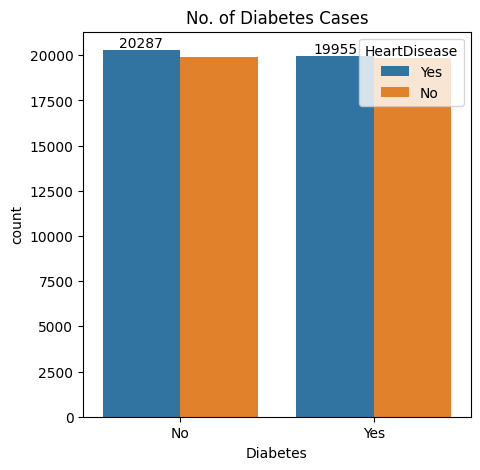

In [14]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='Diabetes',data=df,hue='HeartDisease')
ax.bar_label(ax.containers[0])
plt.title("No. of Diabetes Cases")
plt.show()

In [15]:
df.columns.values

array(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'ST_Slope', 'Diabetes', 'SmokingHistory', 'BMI', 'HeartDisease'],
      dtype=object)

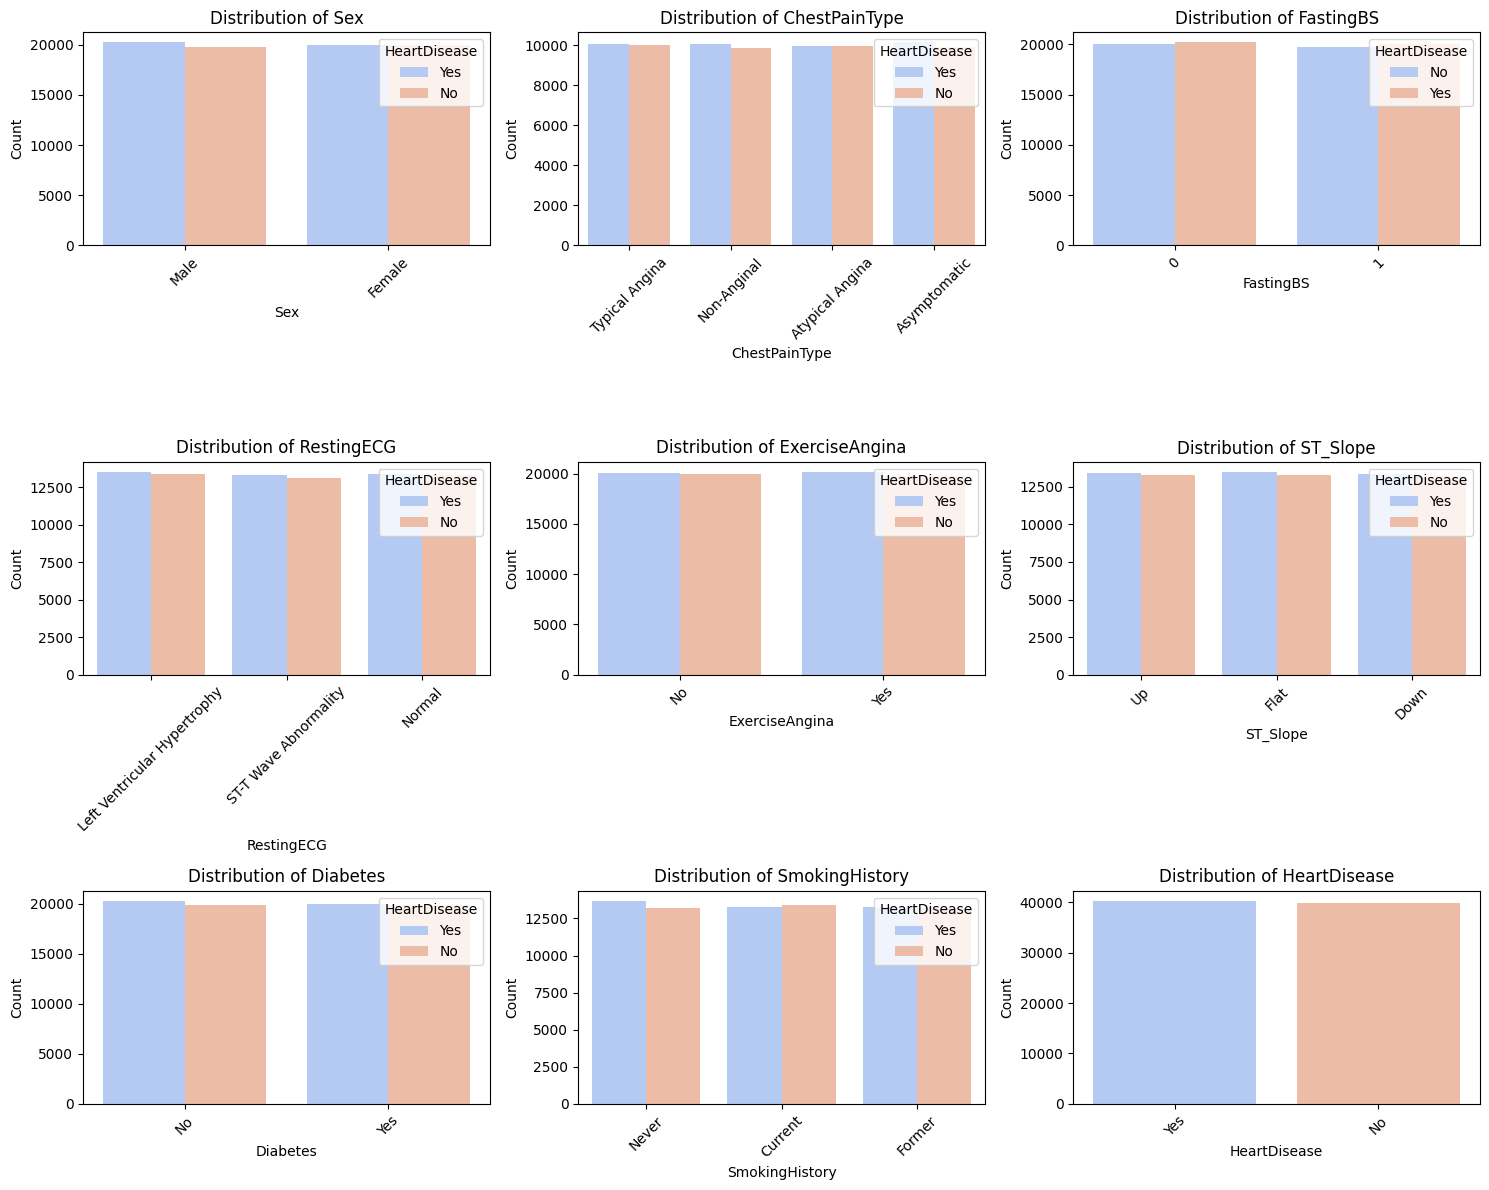

In [16]:
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG',
                        'ExerciseAngina', 'ST_Slope', 'Diabetes', 'SmokingHistory', 'HeartDisease']

rows = (len(categorical_columns) + 2) // 3
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))

axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i], palette="coolwarm",hue="HeartDisease")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Each plot compares the proportion of individuals with and without heart disease across different attributes like Sex, Chest Pain Type, Fasting Blood Sugar, Resting ECG, Exercise-Induced Angina, and ST Slope

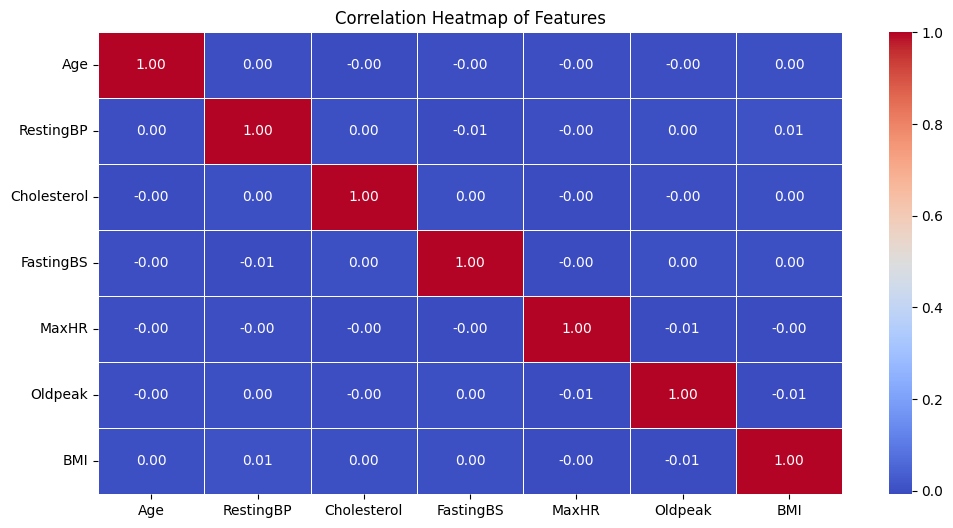

In [17]:
plt.figure(figsize=(12, 6))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

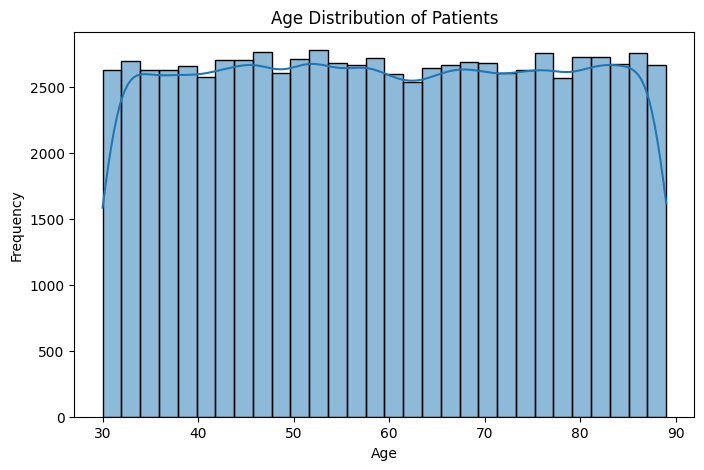

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

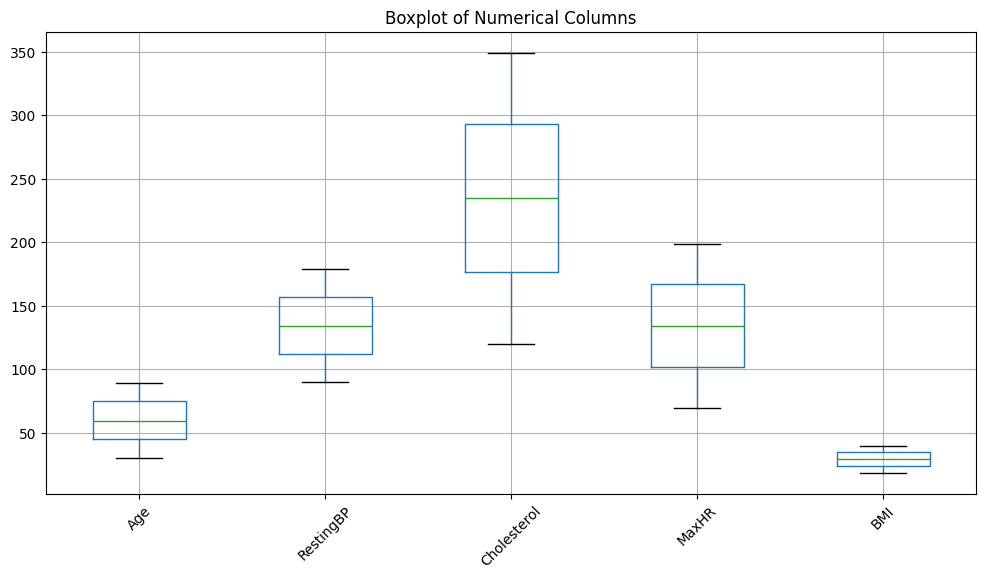

In [19]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'BMI']
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Columns")
plt.show()

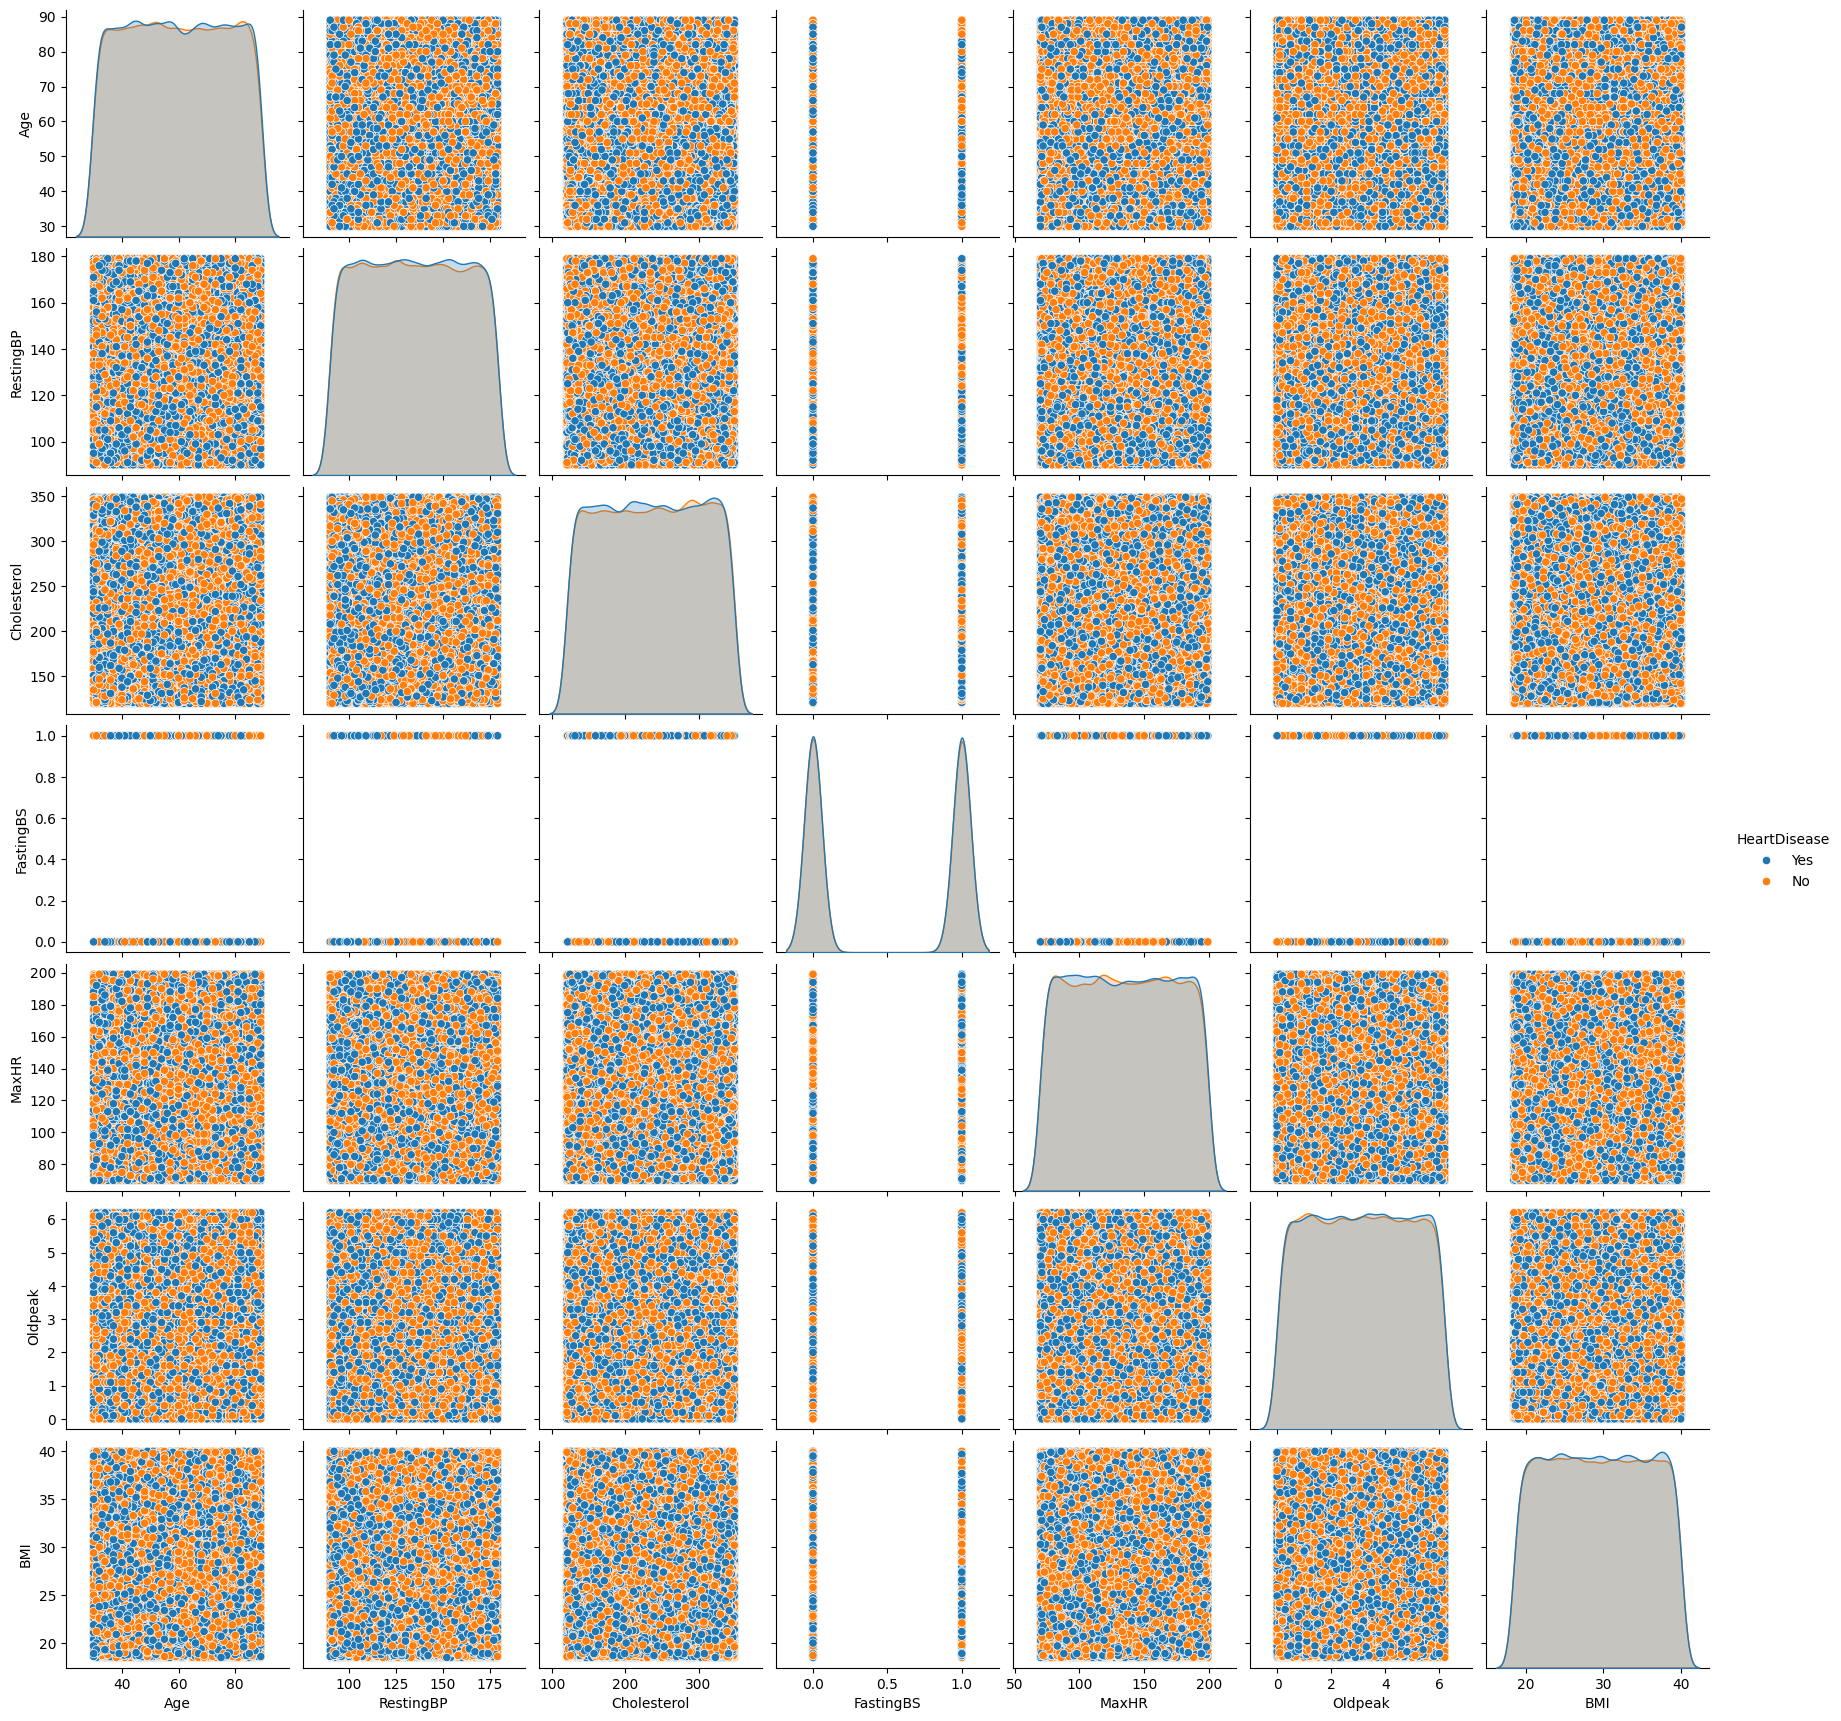

In [27]:
sns.pairplot(df, hue="HeartDisease", diag_kind="kde")
plt.show()


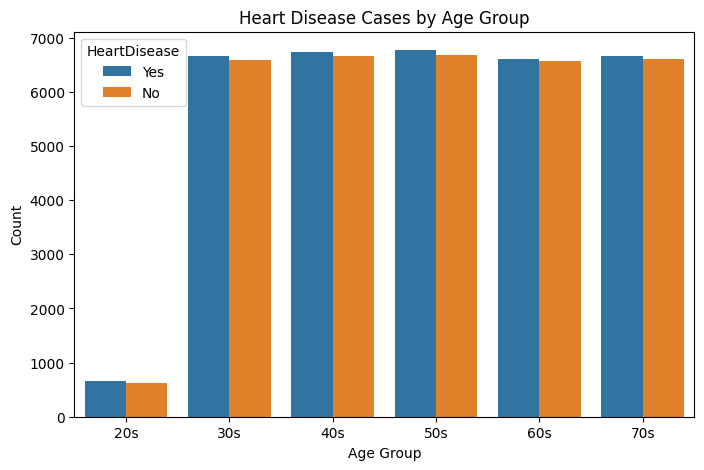

In [21]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=["20s", "30s", "40s", "50s", "60s", "70s"])
plt.figure(figsize=(8,5))
sns.countplot(x="AgeGroup", hue="HeartDisease", data=df)
plt.title("Heart Disease Cases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

<ipython-input-22-4da3ce27baf5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="HeartDisease", y="Cholesterol", data=df, palette="coolwarm")


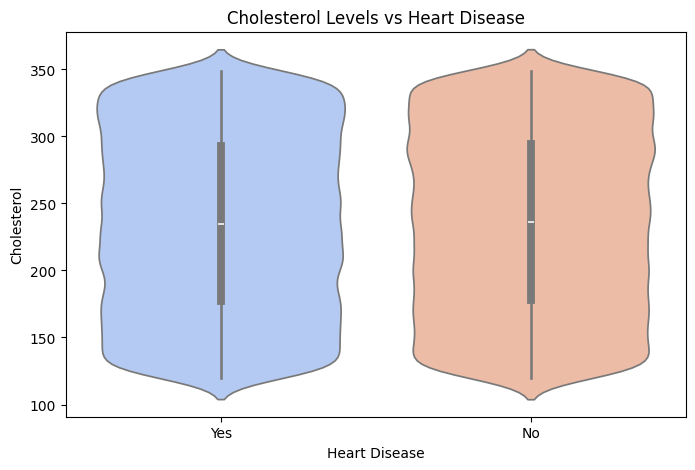

In [22]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="HeartDisease", y="Cholesterol", data=df, palette="coolwarm")
plt.title("Cholesterol Levels vs Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Cholesterol")
plt.show()

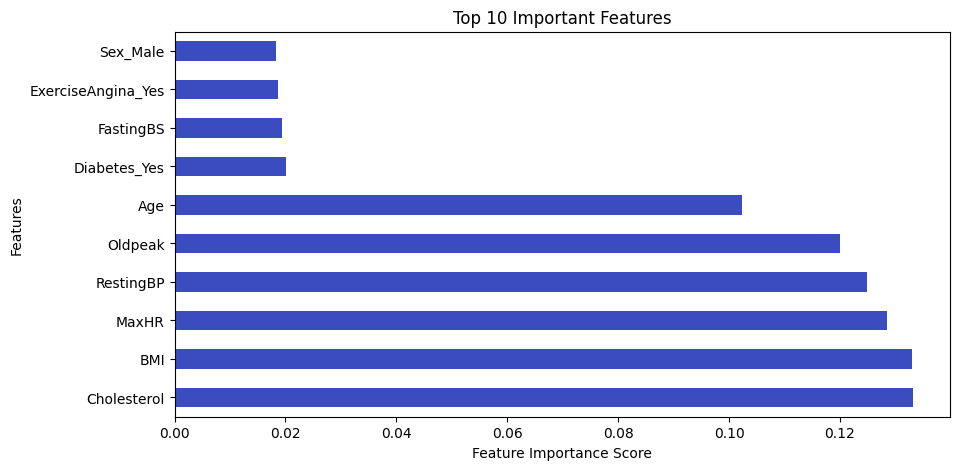

In [23]:
from sklearn.ensemble import RandomForestClassifier

df_encoded = pd.get_dummies(df.drop(columns=['HeartDisease']), drop_first=True)
X = df_encoded
y = df['HeartDisease']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

plt.figure(figsize=(10, 5))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', colormap="coolwarm")
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()
